In [3]:
import pandas as pd

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('bbc_news_dataset.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB
None


In [5]:
X=df['Text']
y=df['Category']

In [6]:
category_names=df['Category'].unique()
print(category_names)


['business' 'tech' 'politics' 'sport' 'entertainment']


In [7]:
value_counts=df['Category'].value_counts
print(value_counts)

<bound method IndexOpsMixin.value_counts of 0            business
1            business
2            business
3                tech
4            business
            ...      
1485    entertainment
1486    entertainment
1487         business
1488             tech
1489             tech
Name: Category, Length: 1490, dtype: object>


In [ ]:
plt.bar(x=category_names,y=value_counts)


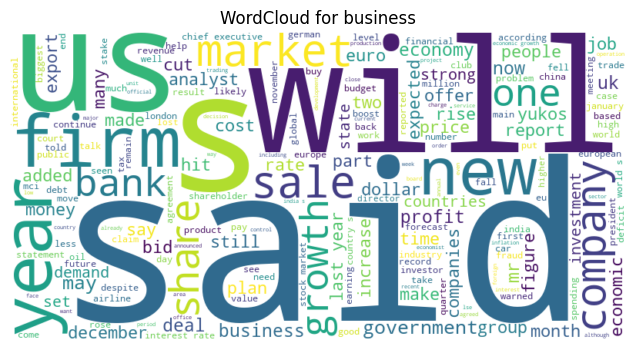

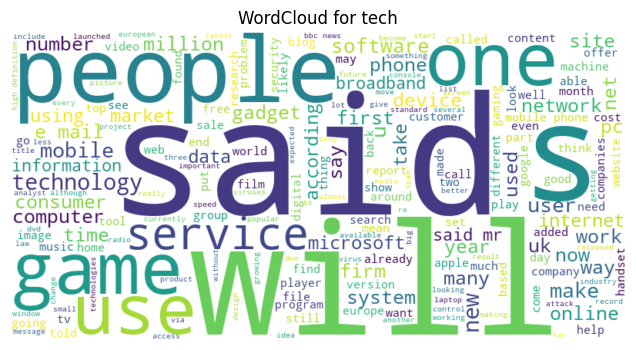

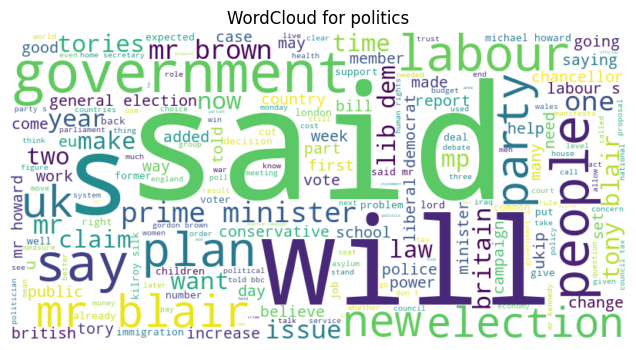

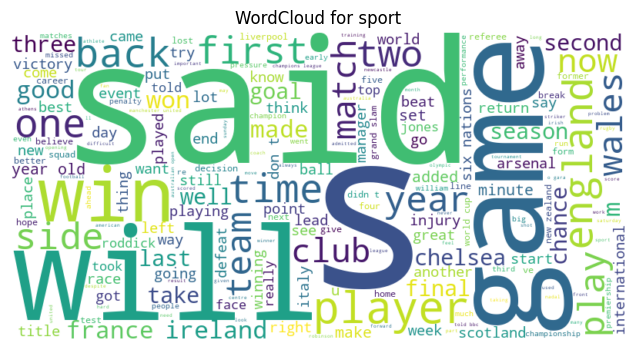

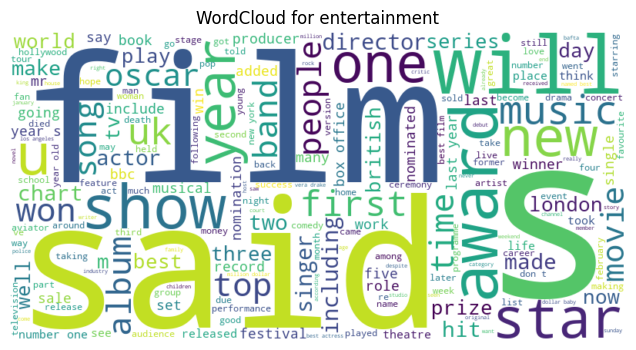

In [12]:
from wordcloud import WordCloud
for category in category_names:
    text="".join(df[df['Category']==category]['Text'].values)
    wc=WordCloud(width=800,height=400,background_color='white').generate(text=text)
    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation ='bilinear')
    plt.title(f'WordCloud for {category}')
    plt.axis('off')
    plt.savefig(f'WordCloud  for {category}.png')
    plt.show()



In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test ,y_train,y_test =train_test_split(
    X,y,test_size=0.2,random_state=42
    
)

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


In [16]:
model=make_pipeline(TfidfVectorizer(stop_words='english'),MultinomialNB())
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9563758389261745


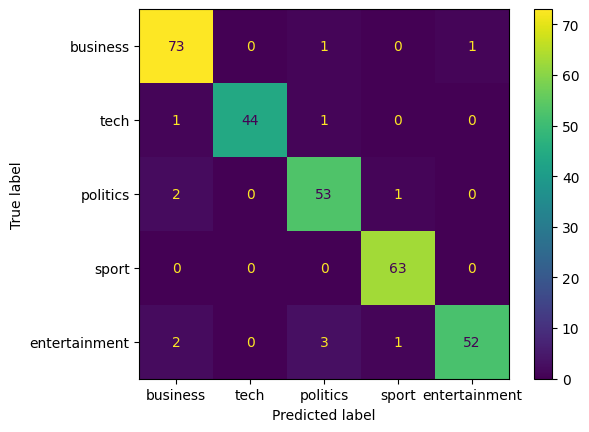

In [17]:
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=category_names)
cm_plot.plot()
plt.savefig('cm_plot.png')
plt.show()

In [18]:
texts=["mr donald trump has resigned from the post of us presidency"]
predictions = model.predict(texts)

for text ,prediction in zip(texts,predictions):
    print(f" predicted {prediction}")

 predicted politics


In [20]:
import joblib
joblib.dump(model,'model.joblib')
print("SUCCESS")

SUCCESS
